({'cam0': tensor([[[[-0.1629, -0.1614, -0.1582,  ..., -0.1513, -0.1515, -0.1516],
          [-0.1615, -0.1600, -0.1572,  ..., -0.1517, -0.1506, -0.1499],
          [-0.1579, -0.1562, -0.1542,  ..., -0.1528, -0.1490, -0.1469],
          ...,
          [ 2.1092,  2.1106,  2.1127,  ...,  2.1969,  2.1976,  2.1980],
          [ 2.1180,  2.1176,  2.1150,  ...,  2.1967,  2.1981,  2.1988],
          [ 2.1227,  2.1213,  2.1166,  ...,  2.1964,  2.1979,  2.1987]],

         [[-0.0545, -0.0530, -0.0497,  ..., -0.0427, -0.0430, -0.0430],
          [-0.0531, -0.0516, -0.0487,  ..., -0.0431, -0.0420, -0.0413],
          [-0.0495, -0.0477, -0.0457,  ..., -0.0443, -0.0403, -0.0382],
          ...,
          [ 2.2683,  2.2697,  2.2718,  ...,  2.3579,  2.3587,  2.3590],
          [ 2.2773,  2.2768,  2.2742,  ...,  2.3577,  2.3591,  2.3598],
          [ 2.2820,  2.2806,  2.2758,  ...,  2.3574,  2.3589,  2.3597]],

         [[ 0.0982,  0.0997,  0.1030,  ...,  0.1100,  0.1097,  0.1097],
          [ 0.0996, 

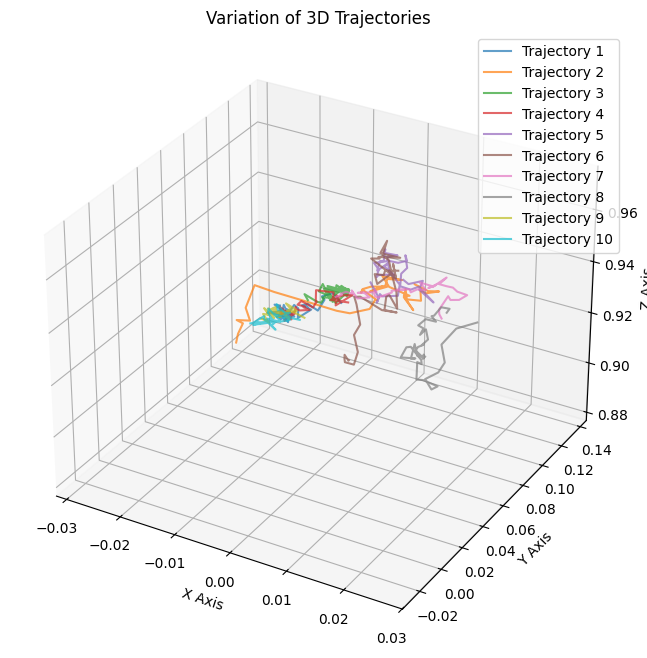

In [31]:
import os
import json
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt


norm_file_path = "/home/horowitz3/latent-diffusion_project/datasets/proc_threading/ac_norm.json"
with open(norm_file_path, "r") as f: 
    norm_dict = json.load(f)
    state_mean = norm_dict["state_norm"]["loc"]
    state_std = norm_dict["state_norm"]["scale"]
    action_mean = norm_dict["action_norm"]["loc"]
    action_std = norm_dict["action_norm"]["scale"]

src_dir = "/tmp/dit_policy_cache_7bea2cc1aa754332321c52dcfc9ab54e/train"
cached_chunks = os.listdir(src_dir)
# print(cached_chunks)
sample_chunk = torch.load(os.path.join(src_dir, cached_chunks[0]))
print(sample_chunk[0])
action_chunk = sample_chunk[1].detach().numpy()  * action_std + action_mean
sample_chunk2 = torch.load(os.path.join(src_dir, cached_chunks[0]))
action_chunk2 = sample_chunk2[1].detach().numpy()  * action_std + action_mean
# print(action_chunk - action_chunk2)
counter = 0
prev_chunk = None
chunk_trajs = []
for chunk_path in cached_chunks:
    if counter == 0: 
        prev_chunk = torch.load(os.path.join(src_dir, chunk_path))
        prev_ac_chunk = prev_chunk[1].detach().numpy() * action_std + action_mean
        prev_chunk_img = prev_chunk[0][0]["cam0"][0].permute(1,2,0).detach().numpy() 
        chunk_trajs.append(prev_ac_chunk)
        # plt.imshow(prev_chunk_img)
        # plt.show()
        counter+=1
        continue 
    else: 
        curr_chunk = torch.load(os.path.join(src_dir, chunk_path)) 
        curr_ac_chunk = curr_chunk[1].detach().numpy() * action_std + action_mean
        print(curr_ac_chunk.shape)
        curr_chunk_img = curr_chunk[0][0]["cam0"][0].permute(1, 2, 0).detach().numpy()
        chunk_trajs.append(curr_ac_chunk)
        # plt.imshow(curr_chunk_img)
        # plt.show()
        # print(np.sum(np.abs(curr_ac_chunk - prev_ac_chunk)))
    counter +=1
trajs = np.array(chunk_trajs)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(trajs[:10])):
    x = trajs[i][:, 0]
    y = trajs[i][:, 1]
    z = trajs[i][:, 2]
    ax.plot(x, y, z, label=f'Trajectory {i+1}', alpha=0.7)

# Set labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Variation of 3D Trajectories')
ax.legend()
plt.show()


